V souboru s daty na Slacku máš data o hodnotách finančních indikátorů 100 největších společností obchodovaných na americké burze. Naším cílem je zjistit, které indikátory nejvíce ovlivňují cenu, a vytvořit model, který odhadne cenu akcie na základě hodnot finančních indikátorů.

Jeden z indikátorů je označený jako Y a je poměrem ceny a účetní hodnoty akcie. Hodnota indikátoru je odrazem ceny akcie. Ostatní indikátory jso následující:

běžná likvidita (Current Ratio, CR),
zadluženost (Debt to Assets, DA),
finanční páka (Financial Leverage, FL)
provozní zisková marže (Operating Profit Margin, OPM),
obrat pohledávek (Receivables Turnover, RT),
obrat celkových aktiv (Total Assets Turnover, TAT).
Úkol můžeš odevzdat jako Jupyter notebook.
Nenahrávej prosím datový soubor na GitHub (neobsahuje veřejně dostupná data). Ze stejného důvodu jsou data anonymizovaná, tj. není v nich obsažen konkrétní název firmy.

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

In [2]:
data=pd.read_csv('df.csv')
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical


**Část 1**

Vytvoř korelační matici a podívej se, který ukazatel má největší vliv na indikátor Y akcie.

In [3]:
data.iloc[:,1:9].corr()

,CR,DA,FL,OPM,RT,TAT,DE,Y
CR,1.000000,-0.225917,-0.179232,0.284529,-0.151203,-0.123665,-0.141136,-0.018690
DA,-0.225917,1.000000,0.340320,0.015032,0.206620,-0.083691,0.464786,0.164599
FL,-0.179232,0.340320,1.000000,-0.112430,-0.076335,0.156169,0.968612,0.759323
OPM,0.284529,0.015032,-0.112430,1.000000,0.051672,-0.298701,-0.050014,0.051308
RT,-0.151203,0.206620,-0.076335,0.051672,1.000000,0.206580,-0.065267,-0.046290
TAT,-0.123665,-0.083691,0.156169,-0.298701,0.206580,1.000000,0.094869,0.301222
DE,-0.141136,0.464786,0.968612,-0.050014,-0.065267,0.094869,1.000000,0.724604
Y,-0.018690,0.164599,0.759323,0.051308,-0.046290,0.301222,0.724604,1.000000


Nejvyšší korelaci má Financial Leverage (FL), a to 0.759323.

**Část 2**

Vytvoř regresní model, který bude mít koeficient Y jako vysvětlovanou proměnnou. Do modelu vlož hodnoty ostatních indikátorů jako vysvětlující proměnné.

S využitím modulu statsmodels vytvoř regresní model a zobraz si tabulku se souhrnem významů. Podívej se na hodnoty koeficientů a na výsledky testu statistické významnosti koeficientů. Pokud je některý koeficient (nebo více koeficientů) nevýznamný, sestav nový model bez tohoto koeficientů (případně beze všech nevýznamných koeficientů).

<Axes: xlabel='FL', ylabel='Y'>

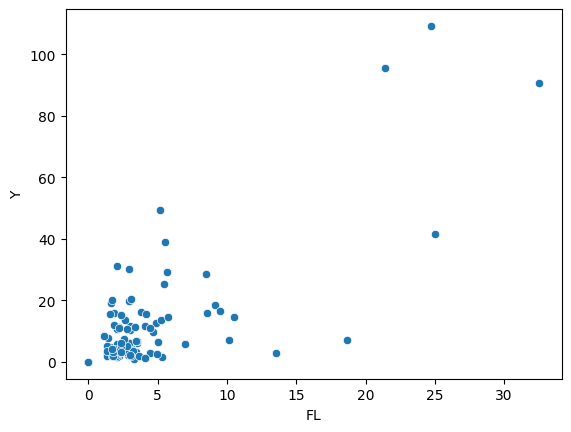

In [4]:
sns.scatterplot(data=data, x='FL', y='Y')

In [5]:
formula = 'Y ~ CR+DA+FL+OPM+RT+TAT'
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     30.43
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           6.00e-20
Time:                        17:40:16   Log-Likelihood:                -376.22
No. Observations:                 100   AIC:                             766.4
Df Residuals:                      93   BIC:                             784.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6707      4.082     -2.614      0.010     -18.776      -2.565
CR             1.4489      1.199      1.209      0.230      -0.932       3.829
DA            -6.2866      7.413     -0.848      0.399     -21.008       8.434
FL             2.6309      0.229     11.509      0.000       2.177       3.085
OPM           22.8252      7.887      2.894      0.005       7.162      38.488
RT            -0.0076      0.021     -0.368      0.714      -0.048       0.033
TAT            8.5566      2.321      3.686      0.000       3.947      13.166
==============================================================================
Omnibus:                       29.178   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.594
Skew:                           0.914   Prob(JB):                     2.88e-21
Kurtosis:                       7.400   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vyřazuji vysvětlující proměnné CR, DA, RT, jejich koeficienty jsou za hranicí významnosti 5%.

In [6]:
formula = 'Y ~ FL+OPM+TAT'
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     59.51
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           7.99e-22
Time:                        17:40:37   Log-Likelihood:                -377.99
No. Observations:                 100   AIC:                             764.0
Df Residuals:                      96   BIC:                             774.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4188      2.865     -3.637      0.000     -16.106      -4.732
FL             2.5281      0.208     12.149      0.000       2.115       2.941
OPM           24.8478      7.542      3.295      0.001       9.878      39.818
TAT            8.5518      2.205      3.879      0.000       4.176      12.928
==============================================================================
Omnibus:                       26.748   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.291
Skew:                           0.876   Prob(JB):                     2.71e-17
Kurtosis:                       6.904   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Tento model nemůžu zamítnout, pravděpodbnosti F statistiky a konstanty a koeficientů jsou po 5%.

Pro všechna data odhadni ukazatel Y s využitím tvého modelu a odhadnuté ceny vlož do původní tabulky s daty. Dále vypočítej rozdíl mezi odhadem koeficientu a jeho skutečnou hodnotou. Najdi akcii, kde je tento rozdíl největší (tj. hledáme akcii, které náš model predikuje výrazně vyšší cenu než jaká je ve skutečnosti, tato akcie je potenciálně na trhu podhodnocená).

In [7]:
data['Y_predicted'] = res.predict(data)
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_predicted
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.502359
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,23.356512
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,6.944718
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,15.708512
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,1.701358


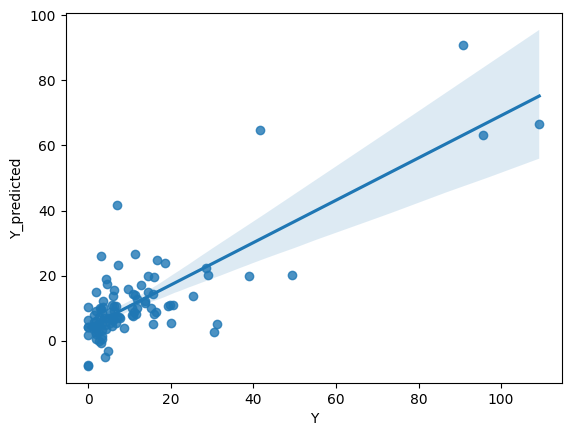

In [8]:
g = sns.regplot(data, x='Y', y='Y_predicted')

<Axes: ylabel='dY'>

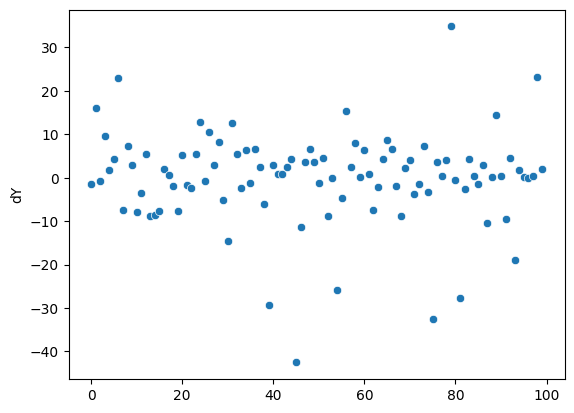

In [9]:
# rozdíl mezi odhadem a skutečnou hodnotou
data['dY']=data['Y_predicted']-data['Y']
data['dY_abs']=data['dY'].abs()
# rezidua vykreslená
sns.scatterplot(data['dY'])

In [10]:
#akcie s největším rozdílem absolutním rozdílem predikce a skutečnosti
data.iloc[data['dY'].idxmax()]

Company              SYXLy
CR                    0.76
DA                    0.37
FL                   18.64
OPM                 0.0631
RT                   12.44
TAT                   0.41
DE                    6.93
Y                     6.97
PT                     3.4
Sector         Industrials
Y_predicted      41.779545
dY               34.809545
dY_abs           34.809545
Name: 79, dtype: object

In [11]:
#akcie s největším absolutním rozdílem predikce a skutečnosti
data.iloc[data['dY_abs'].idxmax()]

Company                     jhFdg
CR                           1.09
DA                           0.48
FL                           24.7
OPM                        0.1913
RT                          13.43
TAT                          1.16
DE                           11.9
Y                          109.24
PT                           4.76
Sector         Consumer Defensive
Y_predicted             66.699306
dY                     -42.540694
dY_abs                  42.540694
Name: 45, dtype: object

V závislosti na tom, jak přesně byal otázka myšlená, lze hledat největší absolutní anebo největší kladný rozdíl.

**Bonus 1**

Sestav model s využitím robustní regrese. Opět proveď vyřazení koeficinetů, které nejsou statisticky významné, a sestav model pouze s významnými koeficienty. Vlož odhady cen do původních dat a opět najdi potenciálně nejvíce podhodnocenou akcii. Jde v případě robustní regese o stejnou akcii, nebo se akcie liší?

In [12]:
formula = 'Y ~ CR+DA+FL+OPM+RT+TAT'
mod = smf.rlm(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      Y   No. Observations:                  100
Model:                            RLM   Df Residuals:                       93
Method:                          IRLS   Df Model:                            6
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 11 Nov 2023                                         
Time:                        17:42:38                                         
No. Iterations:                    33                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.4322      2.551     -3.305      0.001     -13.433      -3.432
CR             1.8591      0.749      2.481      0.013       0.391       3.328
DA            -4.8031      4.634     -1.037      0.300     -13.885       4.279
FL             2.4589      0.143     17.210      0.000       2.179       2.739
OPM           15.3738      4.930      3.118      0.002       5.711      25.037
RT            -0.0032      0.013     -0.247      0.805      -0.028       0.022
TAT            5.4555      1.451      3.760      0.000       2.612       8.299
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [13]:
# Vyřazuji DA a RT, mají p>5%
formula = 'Y ~ CR+FL+OPM+TAT'
mod = smf.rlm(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      Y   No. Observations:                  100
Model:                            RLM   Df Residuals:                       95
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 11 Nov 2023                                         
Time:                        17:42:45                                         
No. Iterations:                    23                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.9579      1.924     -5.176      0.000     -13.729      -6.187
CR             2.0977      0.681      3.081      0.002       0.763       3.432
FL             2.4422      0.123     19.840      0.000       2.201       2.683
OPM           13.9913      4.560      3.068      0.002       5.054      22.929
TAT            5.3858      1.290      4.176      0.000       2.858       7.913
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [14]:
data['Y_robust'] = res.predict(data)
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_predicted,dY,dY_abs,Y_robust
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.502359,-1.447641,1.447641,1.167348
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,23.356512,16.096512,16.096512,20.203407
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,6.944718,-0.835282,0.835282,7.832927
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,15.708512,9.538512,9.538512,11.557664
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,1.701358,1.701358,1.701358,-0.085471


<Axes: >

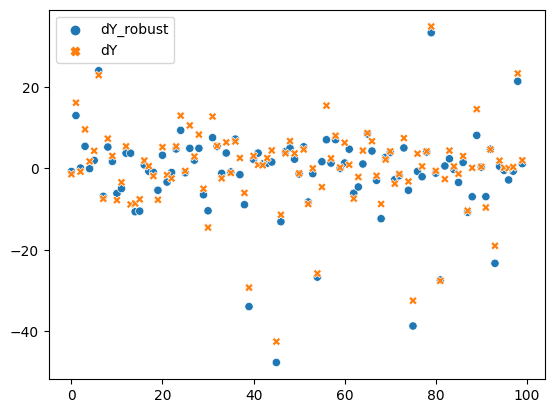

In [15]:
# rozdíl mezi robustním odhadem a skutečnou hodnotou
data['dY_robust']=data['Y_robust']-data['Y']
data['dY_abs_robust']=data['dY_robust'].abs()
# rezidua vykreslená
sns.scatterplot(data[['dY_robust','dY']])

In [16]:
#akcie s největším absolutním rozdílem predikce a skutečnosti
data.iloc[data['dY_abs_robust'].idxmax()]

Company                       jhFdg
CR                             1.09
DA                             0.48
FL                             24.7
OPM                          0.1913
RT                            13.43
TAT                            1.16
DE                             11.9
Y                            109.24
PT                             4.76
Sector           Consumer Defensive
Y_predicted               66.699306
dY                       -42.540694
dY_abs                    42.540694
Y_robust                  61.575338
dY_robust                -47.664662
dY_abs_robust             47.664662
Name: 45, dtype: object

**Bonus 2:**

Použij původní (tedy "nerobustní") model a vyčísli Cookovu vzdálenost pro všechny hodnoty. Vyřaď všechny akcie s Cookovou vzdáleností vyšší než 1 a přepočítej regresní model. Nakonec opět najdi potenciálně nejvíce podhodnocenou akcii a podívej se, jestli jde o stejnou akcii jako u předchozích modelů.

In [17]:
# OLS model pro všechny vysvětlující proměnné
data2=pd.read_csv('df.csv')
formula = 'Y ~ CR+DA+FL+OPM+RT+TAT'
mod = smf.ols(formula=formula, data=data2)
res = mod.fit()
res.summary()
# Cookova vzdálenost
influence = OLSInfluence(res)
data2['cook_distance'] = influence.cooks_distance[0]
data2.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,cook_distance
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.000063
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,0.015091
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,0.000378
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,0.009419
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,0.000006


In [18]:
# data po vyřazení bodů s Cookovou vzdáleností>1
print(data2.shape)
data2.drop(data2.loc[data2['cook_distance']>=1].index, inplace=True)
print(data2.shape)

(100, 12)
(99, 12)


In [19]:
# OLS model pro všechny vysvětlující proměnné po odstranění bodů s nevyhovující Cookovou vzdáleností
formula = 'Y ~ CR+DA+FL+OPM+RT+TAT'
mod = smf.ols(formula=formula, data=data2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     30.23
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           8.87e-20
Time:                        17:43:42   Log-Likelihood:                -372.59
No. Observations:                  99   AIC:                             759.2
Df Residuals:                      92   BIC:                             777.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.2547      4.120     -2.489      0.015     -18.437      -2.072
CR             1.3516      1.207      1.120      0.266      -1.045       3.748
DA            -6.7331      7.446     -0.904      0.368     -21.521       8.054
FL             2.6155      0.230     11.385      0.000       2.159       3.072
OPM           21.8914      7.982      2.743      0.007       6.039      37.744
RT            -0.0614      0.068     -0.897      0.372      -0.197       0.075
TAT            9.7860      2.762      3.543      0.001       4.300      15.272
==============================================================================
Omnibus:                       29.907   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.512
Skew:                           0.965   Prob(JB):                     4.94e-21
Kurtosis:                       7.353   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# po vyřazení CR, DA, RT, ketré mají p>5%
formula = 'Y ~ FL+OPM+TAT'
mod = smf.ols(formula=formula, data=data2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     58.82
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           1.40e-21
Time:                        17:43:48   Log-Likelihood:                -374.53
No. Observations:                  99   AIC:                             757.1
Df Residuals:                      95   BIC:                             767.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.5042      2.878     -3.649      0.000     -16.218      -4.790
FL             2.5194      0.209     12.035      0.000       2.104       2.935
OPM           25.5674      7.665      3.335      0.001      10.350      40.785
TAT            8.6097      2.214      3.888      0.000       4.214      13.006
==============================================================================
Omnibus:                       26.482   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.334
Skew:                           0.879   Prob(JB):                     7.22e-17
Kurtosis:                       6.864   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [301]:
data2['Y_predicted'] = res.predict(data2)
data2.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,cook_distance,Y_predicted
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.000063,0.476168
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,0.015091,23.349641
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,0.000378,7.108323
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,0.009419,15.747121
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,0.000006,1.790489


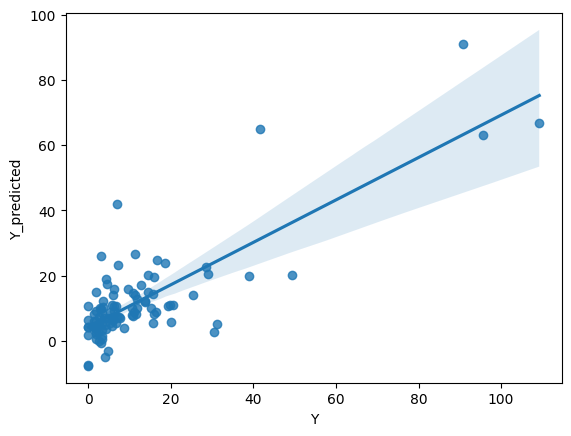

In [303]:
g = sns.regplot(data, x='Y', y='Y_predicted')

<Axes: ylabel='dY'>

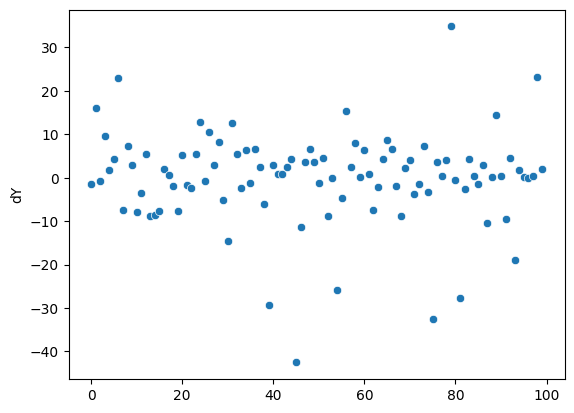

In [304]:
# rozdíl mezi odhadem a skutečnou hodnotou
data['dY']=data['Y_predicted']-data['Y']
data['dY_abs']=data['dY'].abs()
# rezidua vykreslená
sns.scatterplot(data['dY'])

In [21]:
#akcie s největším absolutním rozdílem predikce a skutečnosti
data.iloc[data['dY_abs_robust'].idxmax()]

Company                       jhFdg
CR                             1.09
DA                             0.48
FL                             24.7
OPM                          0.1913
RT                            13.43
TAT                            1.16
DE                             11.9
Y                            109.24
PT                             4.76
Sector           Consumer Defensive
Y_predicted               66.699306
dY                       -42.540694
dY_abs                    42.540694
Y_robust                  61.575338
dY_robust                -47.664662
dY_abs_robust             47.664662
Name: 45, dtype: object

**Bonus 3:**

Přidej Sektor (poslední sloupec) jako vysvětlující proměnnou s využitím One Hot Encoding. Podívej se, které sektory mají kladný koeficient a které sektory mají záporný koeficient.

In [31]:
data3=pd.read_csv('df.csv')
data3['Sector'].unique()

array(['Industrials', 'Communication Services', 'Consumer Defensive',
       'Consumer Cyclical', 'Healthcare', 'Basic Materials', 'Technology',
       'Energy', 'Conglomerates', 'Financial Services'], dtype=object)

In [34]:
ctg = pd.get_dummies(data3['Sector'],dtype=float)
data3 = pd.merge(data3, ctg, left_index=True, right_index=True)
data3.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,...,Basic Materials,Communication Services,Conglomerates,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Technology
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
data3.rename(columns={'Basic Materials': 'BM', 'Communication Services': 'CS', 'Conglomerates': 'CG', 'Consumer Cyclical': 'CC', 'Consumer Defensive': 'CD', 'Energy': 'EN', 'Financial Services': 'FS', 'Healthcare': 'HE', 'Industrials': 'IN', 'Technology': 'TE'}, inplace=True)

In [51]:
formula = 'Y ~ CR+DA+FL+OPM+RT+TAT+BM+CS+CG+CC+CD+EN+FS+HE+IN'
mod = smf.ols(formula=formula, data=data3)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     13.77
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           8.87e-17
Time:                        18:07:36   Log-Likelihood:                -368.48
No. Observations:                 100   AIC:                             769.0
Df Residuals:                      84   BIC:                             810.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0137      4.844     -1.035      0.304     -14.646       4.619
CR             1.2647      1.239      1.021      0.310      -1.199       3.728
DA            -5.2231      7.546     -0.692      0.491     -20.229       9.782
FL             2.5391      0.228     11.146      0.000       2.086       2.992
OPM           16.9974      8.625      1.971      0.052      -0.155      34.149
RT            -0.0141      0.022     -0.654      0.515      -0.057       0.029
TAT            7.0062      2.525      2.775      0.007       1.985      12.027
BM            -1.0691      6.704     -0.159      0.874     -14.400      12.262
CS            -5.4616      4.219     -1.294      0.199     -13.852       2.929
CG            -5.6313     10.857     -0.519      0.605     -27.221      15.958
CC             2.5057      4.194      0.597      0.552      -5.834      10.845
CD            -0.8296      5.057     -0.164      0.870     -10.886       9.227
EN            -7.3293      5.089     -1.440      0.154     -17.449       2.791
FS             7.7964      6.817      1.144      0.256      -5.761      21.353
HE            -5.0553      3.398     -1.488      0.141     -11.814       1.703
IN            -8.7637      3.976     -2.204      0.030     -16.671      -0.856
==============================================================================
Omnibus:                       29.228   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.771
Skew:                           0.925   Prob(JB):                     7.16e-21
Kurtosis:                       7.340   Cond. No.                         657.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
formula = 'Y ~ FL+OPM+TAT+IN'
mod = smf.ols(formula=formula, data=data3)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     47.72
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           6.15e-22
Time:                        18:11:37   Log-Likelihood:                -375.44
No. Observations:                 100   AIC:                             760.9
Df Residuals:                      95   BIC:                             773.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.1237      2.990     -2.717      0.008     -14.060      -2.187
FL             2.5713      0.205     12.553      0.000       2.165       2.978
OPM           20.9648      7.593      2.761      0.007       5.890      36.039
TAT            7.5991      2.202      3.451      0.001       3.227      11.971
IN            -7.0852      3.179     -2.229      0.028     -13.397      -0.774
==============================================================================
Omnibus:                       26.306   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.687
Skew:                           0.938   Prob(JB):                     2.44e-14
Kurtosis:                       6.395   Cond. No.                         52.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Postupným vylučováním vysvětlujících proměnných jsem dostala model, který nemohu zamítnout. Není asi jediný, z časových důvodů tady analýzu končím.